In [1]:
import os
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalMaxPooling2D
from keras.models import Sequential, load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import multiprocessing as mp
from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set working Dir
path = "D:\Python\Image-Recommendation"
os.chdir(path)
os.getcwd()

'D:\\Python\\Image-Recommendation'

In [3]:
df = pd.read_csv('Save-Dataset/product_data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.shape

(39194, 8)

In [4]:
df = pd.read_csv('Save-Dataset/product_data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.shape

train_df = pd.read_csv('save-dataset/train.csv')
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)

test_df = pd.read_csv('save-dataset/test.csv')
test_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
print('Train-DF shape:', train_df.shape)
print('Test-DF shape:', test_df.shape)

Train-DF shape: (29395, 8)
Test-DF shape: (9799, 8)


In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [7]:
# Add preprocessing layer to the front of VGG
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
# don't train existing weights
for layer in xception.layers:
  layer.trainable = False

In [9]:
# useful for getting number of classes
folders = glob('train-test-dataset\\train\\*')
print(folders)

['train-test-dataset\\train\\Cell Phones and Accessories', 'train-test-dataset\\train\\Clothing Men', 'train-test-dataset\\train\\Clothing Women', 'train-test-dataset\\train\\Electronics', 'train-test-dataset\\train\\Home and Kitchen', 'train-test-dataset\\train\\Pet Supplies', 'train-test-dataset\\train\\Shoes', 'train-test-dataset\\train\\Watches']


In [10]:
# our layers - you can add more if you want
x = Flatten()(xception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
# create a model object
model = Model(inputs=xception.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [16]:
pip install pydot

In [17]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [18]:
plot_model(model, to_file='model/model_plot_xception.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

In [17]:
training_set = train_datagen.flow_from_directory('train-test-dataset/train',                                                 
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training',
                                                 shuffle=True,
                                                 seed=42)

Found 23517 images belonging to 8 classes.


In [18]:
validation_set = train_datagen.flow_from_directory('train-test-dataset/train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    subset='validation',
                                                    shuffle=True,
                                                    seed=42)

Found 5878 images belonging to 8 classes.


In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
testing_set = test_datagen.flow_from_directory('train-test-dataset/test',                                                 
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',                                                 
                                                 shuffle=True,
                                                 seed=42)

Found 9799 images belonging to 8 classes.


In [21]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set),    
)

Epoch 1/10
735/735 [==============================] - 2725s 4s/step - loss: 3.5649 - accuracy: 0.7465 - val_loss: 4.8814 - val_accuracy: 0.7203
Epoch 2/10
735/735 [==============================] - 2994s 4s/step - loss: 3.2210 - accuracy: 0.7957 - val_loss: 4.4371 - val_accuracy: 0.7805
Epoch 3/10
735/735 [==============================] - 3666s 5s/step - loss: 2.9065 - accuracy: 0.8180 - val_loss: 4.9565 - val_accuracy: 0.7714
Epoch 4/10
735/735 [==============================] - 3940s 5s/step - loss: 2.7454 - accuracy: 0.8306 - val_loss: 5.3029 - val_accuracy: 0.7759
Epoch 5/10
735/735 [==============================] - 3153s 4s/step - loss: 2.4233 - accuracy: 0.8494 - val_loss: 5.3087 - val_accuracy: 0.7761
Epoch 6/10
735/735 [==============================] - 3118s 4s/step - loss: 2.3670 - accuracy: 0.8559 - val_loss: 5.1727 - val_accuracy: 0.7860
Epoch 7/10
735/735 [==============================] - 3298s 4s/step - loss: 2.3756 - accuracy: 0.8616 - val_loss: 6.4048 - val_accuracy:

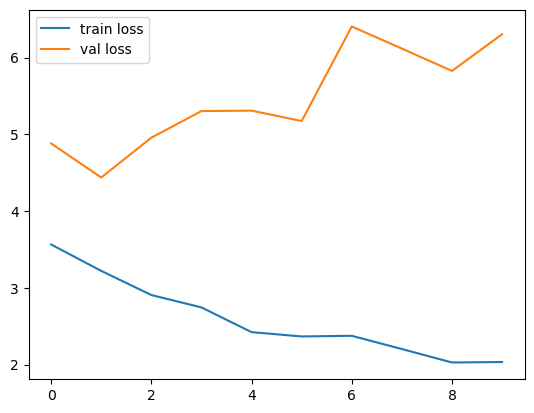

<Figure size 640x480 with 0 Axes>

In [22]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

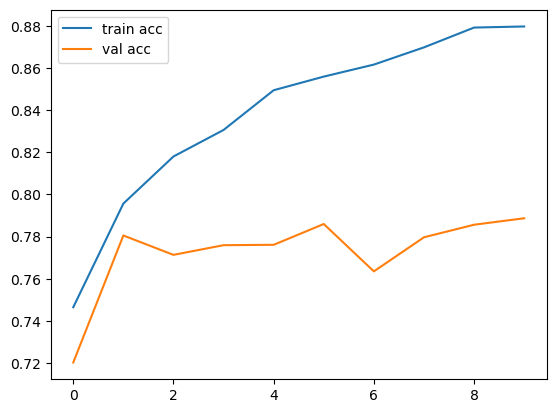

<Figure size 640x480 with 0 Axes>

In [23]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
print("Total Params:", model.count_params())

Total Params: 21664304


In [25]:
print("Accuracy : ", model.evaluate(testing_set))

307/307 [==============================] - 1404s 5s/step - loss: 3.1073 - accuracy: 0.8724
Accuracy :  [3.1072986125946045, 0.872435986995697]


---